In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = load_breast_cancer()

In [3]:
## simple random forest

rfc = RandomForestClassifier(n_estimators=100,random_state=90)
score_pre = cross_val_score(rfc,data.data,data.target,cv=10).mean()
score_pre

0.9648809523809524

0.9631265664160402 71


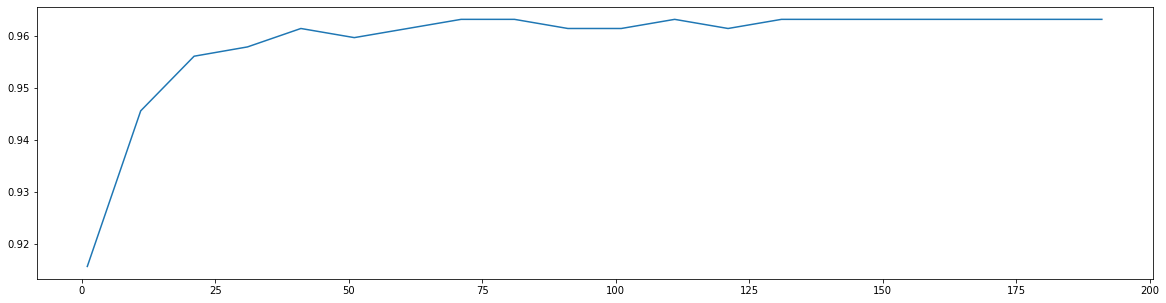

In [6]:
## adust n_estimators

scorel = []
for i in range(1,201,10):
    rfc = RandomForestClassifier(n_estimators=i,
                                 n_jobs=-1,
                                 random_state=90)
    score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show()

0.9666353383458647 73


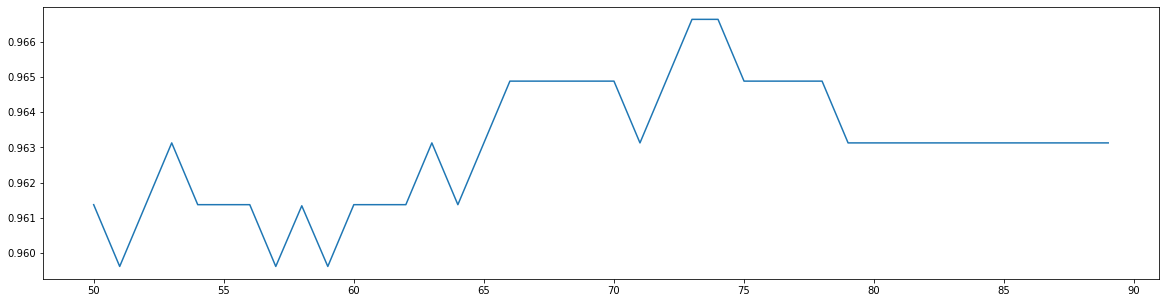

In [7]:
##  find estimate at 71 is the best
## continue to fine tune

scorel = []
for i in range(50,90):
    rfc = RandomForestClassifier(n_estimators=i,
                                 n_jobs=-1,
                                 random_state=90)
    score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
    scorel.append(score)
print(max(scorel),([*range(50,90)][scorel.index(max(scorel))]))
plt.figure(figsize=[20,5])
plt.plot(range(50,90),scorel)
plt.show()

## grid search

In [9]:
##  using Grid search to repeat above steps to find 71 for n_estimators
param_grid = {'n_estimators':np.arange(1, 201, 10)}
rfc = RandomForestClassifier(n_jobs=-1,
                                 random_state=90)
                           
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)
GS.best_params_


{'n_estimators': 71}

In [10]:
GS.best_score_

0.9631265664160402